# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Import all the neccessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Splits the data into train and test
from sklearn.model_selection import train_test_split

# We use this to build linear regression_model
from sklearn.linear_model import LinearRegression

# This is for checking model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Used to build linear regression models using stats models
import statsmodels.api as sm

# Used to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Connecting my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
# Read the data and make sure it is the correct data and it works
data = pd.read_csv('/content/drive/MyDrive/Colab/used_device_data.csv')
# returns the first 10 rows
data.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


## Data Overview

- Observations
- Sanity checks

In [ ]:
# Finding the shape of the data, 3454 rows and 15 columns
data.shape

(3454, 15)

In [ ]:
# Information about the data more importantly the type of data. For instance, object, int64, or float64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
# Use this to find missing values in each column
data.isnull().sum()
# We can see that there are some missing values in the rows main_camera_mp, selfie camera_mp, in_memory, ram, battery, and weight

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Use this to find duplicate entries in the dataset
data.duplicated().sum()
# In this dataset we have no duplicates

0

In [ ]:
# Use this to find statistical data about the numerical variables
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [ ]:
# Making a copy of the original just incase we have to make changes
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

#### Numerical Variables

In [ ]:
# In order to get a good idea of the distribution of these variable, a histogram or/and box plot would be the best. 
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize = (15,10))

sns.boxplot(df['normalized_used_price'], ax = ax_box, color = 'mistyrose', showmeans = True)
sns.histplot(data = df, x = 'normalized_used_price', ax = ax_hist, color = "coral", )

ax_hist.axvline(df['normalized_used_price'].mean())

ax_box.set(xlabel='')
plt.show()

In [ ]:
# That was a lot of code for one image, so lets make it a function so we can reproduce it for the other variables.
def combo_hist_box(df, variable):

  f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, figsize = (12,8))

  sns.boxplot(df[variable], ax = ax_box, color = 'mistyrose', showmeans = True)
  sns.histplot(data = df, x = variable, ax = ax_hist, color = "coral", )

  ax_hist.axvline(df[variable].mean())

  ax_box.set(xlabel='')
  plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


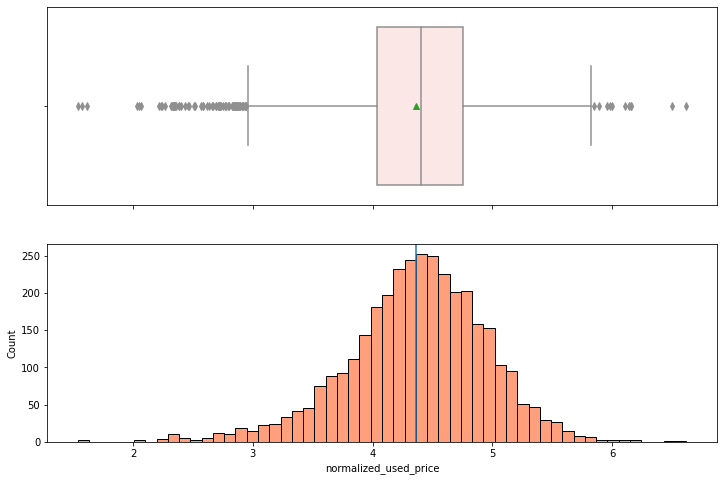

In [ ]:
combo_hist_box(df, 'normalized_used_price')
# We can see that the normalized_used_price is indeed normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


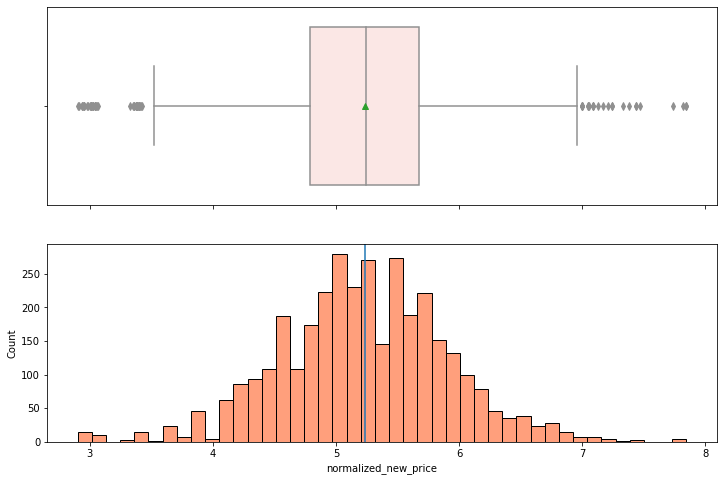

In [ ]:
combo_hist_box(df, 'normalized_new_price')
# We can see that the normalized_new_price is indeed normally distributed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


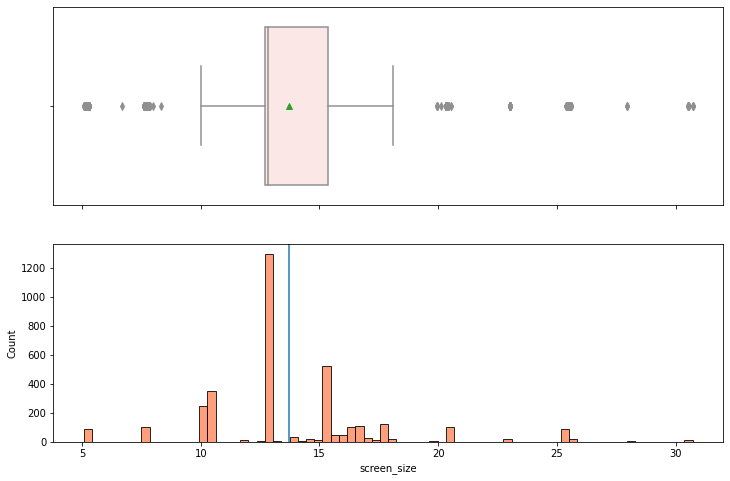

In [ ]:
combo_hist_box(df, 'screen_size')
# We can see from the image that there is one screen size that is pretty popular or maybe they just buy and sell that size a lot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


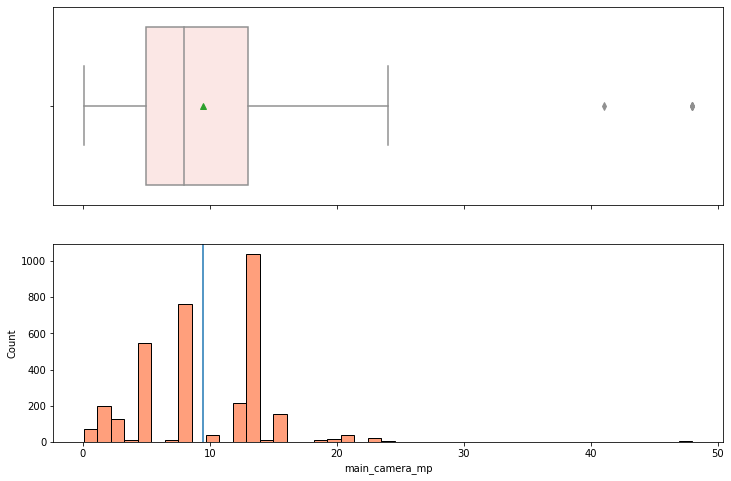

In [ ]:
combo_hist_box(df, 'main_camera_mp')
# Most cameras are similar with a few outliers of really good quality

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


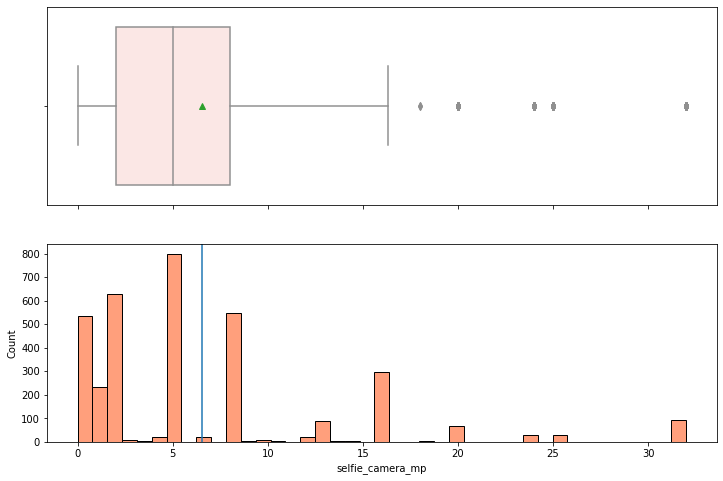

In [ ]:
combo_hist_box(df, 'selfie_camera_mp')
# We can compare and see that selfie cameras are not as good as the main camera

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


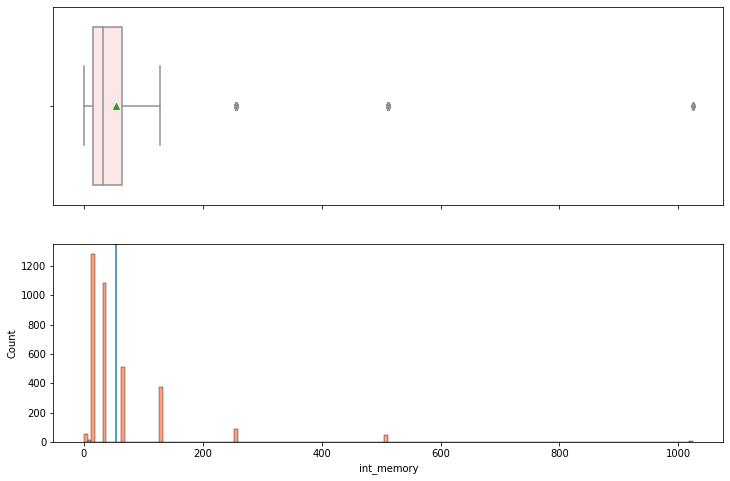

In [ ]:
combo_hist_box(df, 'int_memory')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


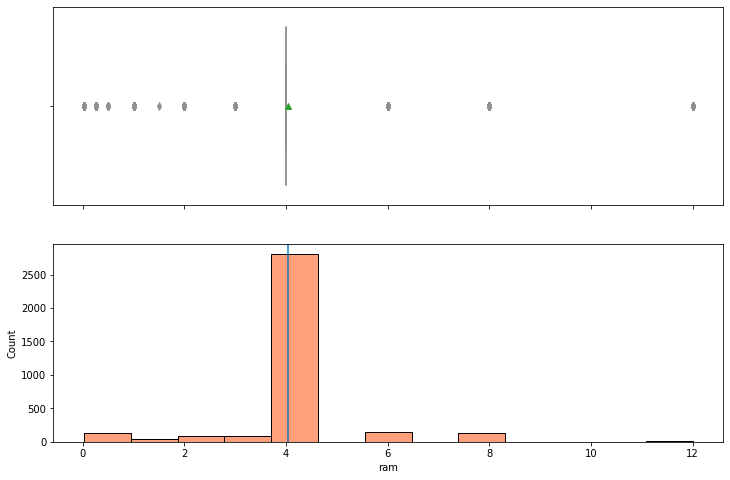

In [ ]:
combo_hist_box(df, 'ram')
# Most phone used 4 units of ram and its pretty clear to see

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


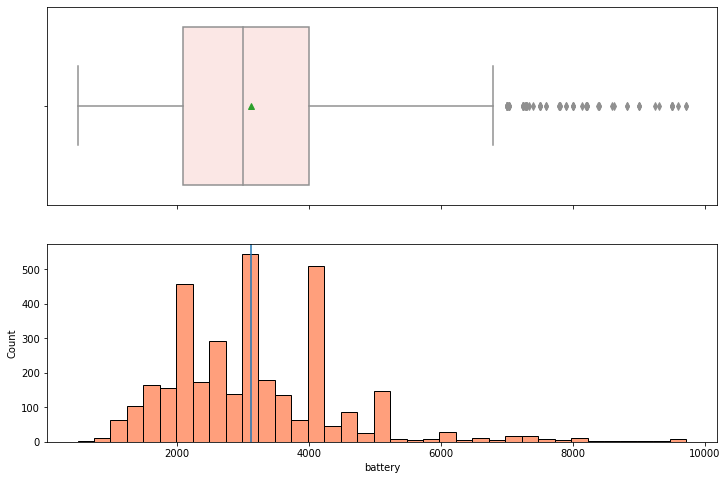

In [ ]:
combo_hist_box(df, 'battery')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


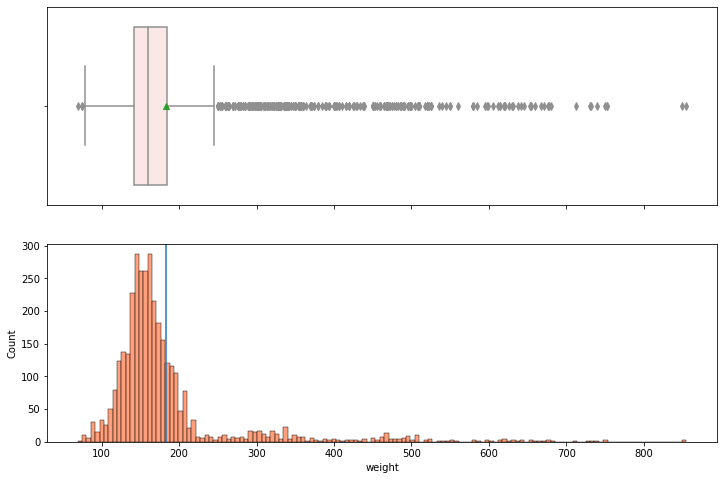

In [ ]:
combo_hist_box(df, 'weight')
# We can see the majority of phones are in between the range 100 units to 200 units with a long tail of heavier phones

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


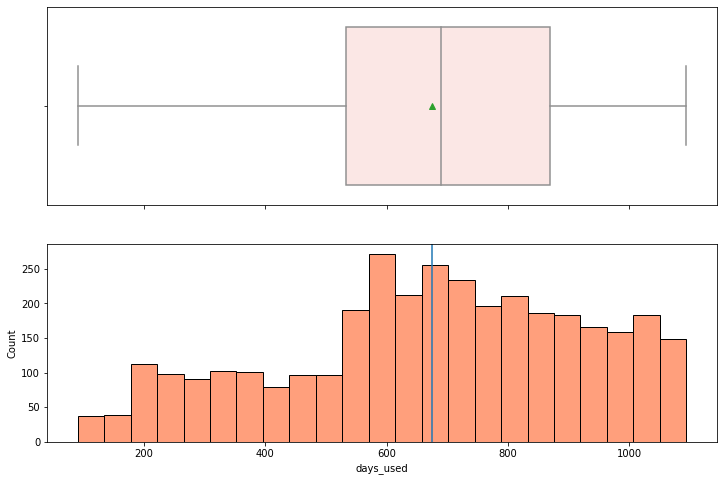

In [ ]:
combo_hist_box(df, 'days_used')
# This is a interesting graph since it somewhat deals with release_year because the longer the phone has been out obviously the more use days.

#### Categorical Variables

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
ax = sns.countplot(df["brand_name"], 
                   order = df["brand_name"].value_counts().index)

for p, label in zip(ax.patches, df["brand_name"].value_counts().values):
    ax.annotate(label, (p.get_x(), p.get_height()))

plt.show()

In [ ]:
# Once again a lot of code for one graph so might as well make a function for it
def labeled_count (data, variable):

  plt.figure(figsize=(12,8))
  plt.xticks(rotation=90)
  ax = sns.countplot(df[variable], 
                   order = df[variable].value_counts().index)

  for p, label in zip(ax.patches, df[variable].value_counts().values):
    ax.annotate(label, (p.get_x(), p.get_height()))

  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


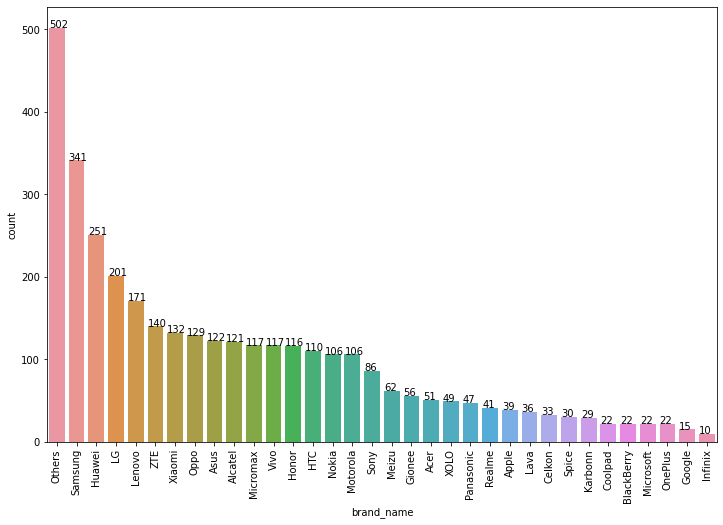

In [ ]:
labeled_count (df, 'brand_name')
# A nice graph that shows every how many phones of each brand they traded. With the most besides other being Android by a good lead.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


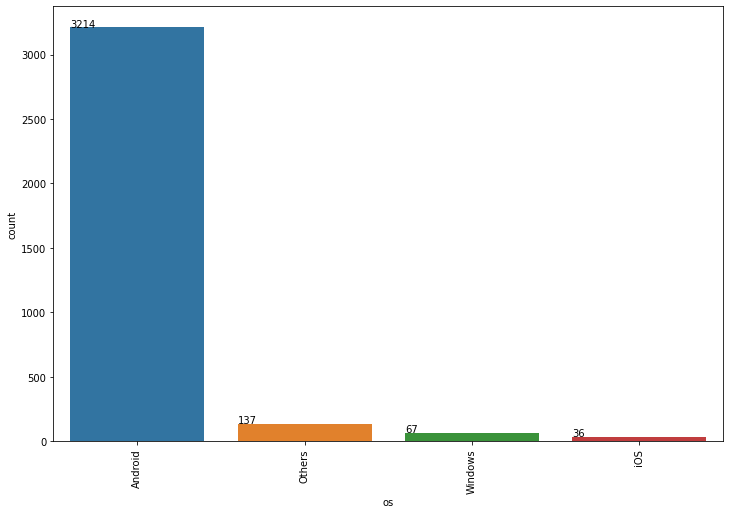

In [ ]:
labeled_count (df, 'os')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


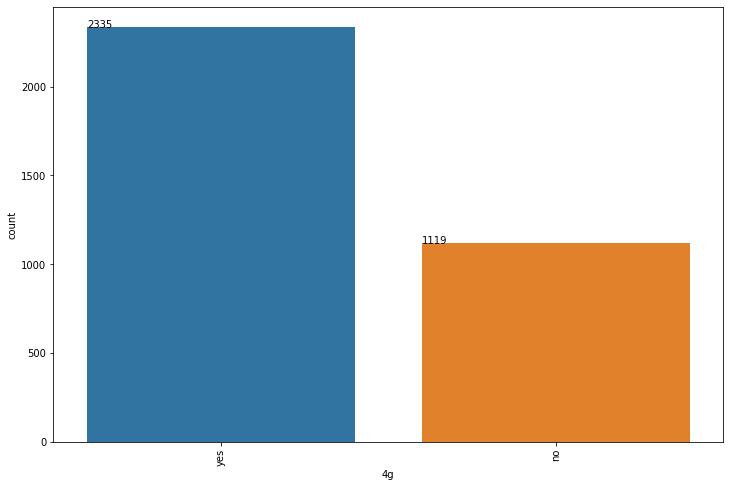

In [ ]:
labeled_count (df, '4g')
# Good graph, most phones in the past few years have 4g and the graph backs it up

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


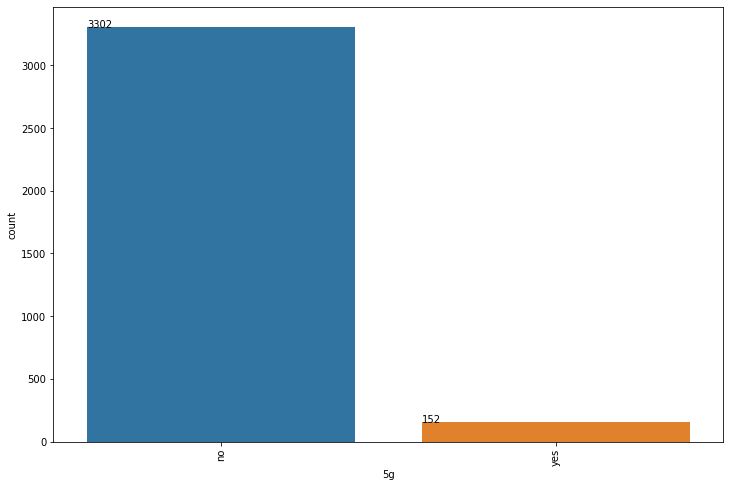

In [ ]:
labeled_count (df, '5g')
# Since they are most likely dealing with more older phone it would make sense not all of them would have 5g

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


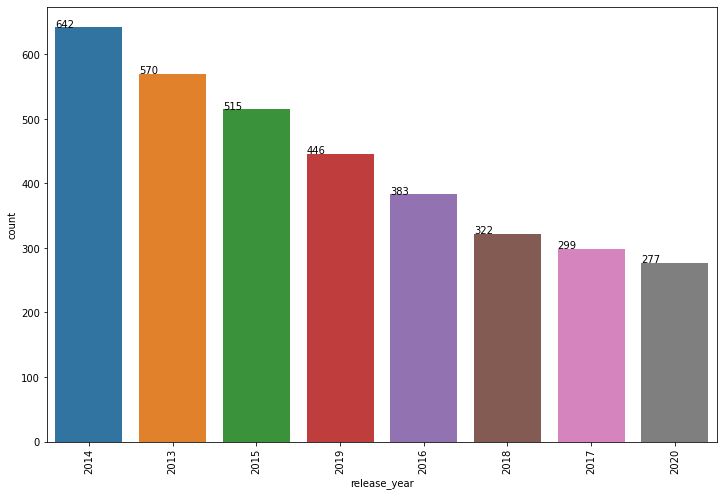

In [ ]:
labeled_count (df, 'release_year')
# Makes sense they deal with more older phones because stay with a new phone for a few years.

### Bivariate Analysis

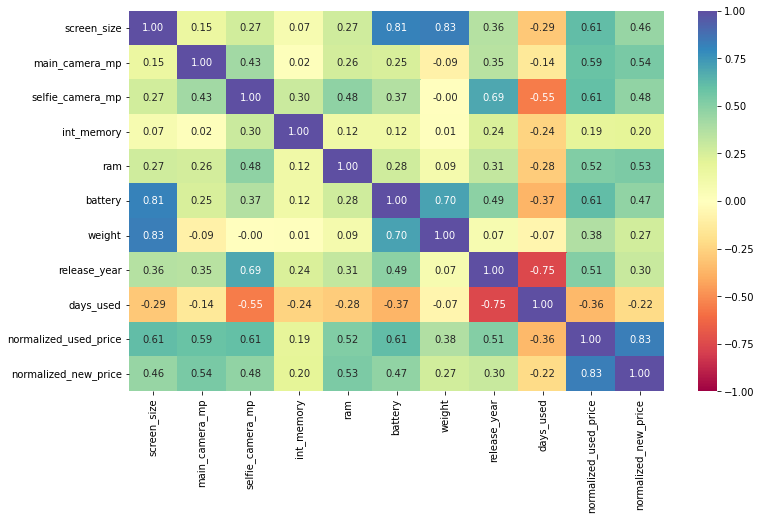

In [ ]:
# Lets do a correlation check to see if any of our variables are related.
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()
# We can see some relations between variables especially between screen size and weight

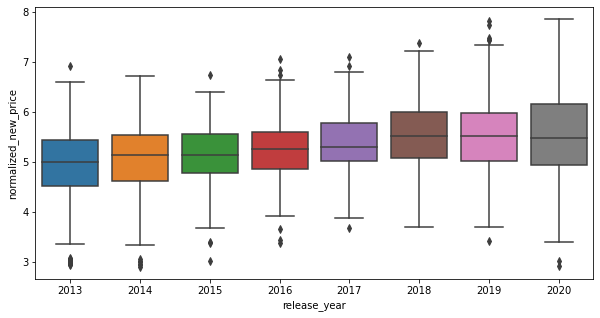

In [ ]:
# Lets take a look at the relationship of release_year and normalized_new_price
plt.figure(figsize = (10,5))
sns.boxplot(data=data, x = 'release_year', y = 'normalized_new_price')
plt.show()
# This is kind of expected as newer phones come out they are priced higher

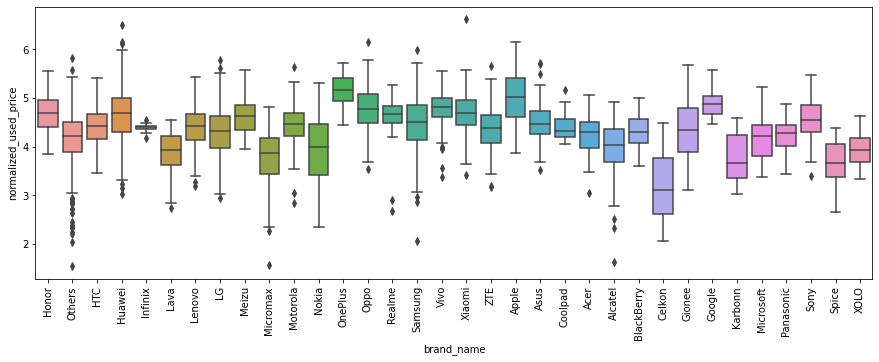

In [ ]:
# Lets take a look at brand_name and main_camera_mp
plt.figure(figsize = (15,5))
sns.boxplot(data=data, x = 'brand_name', y = 'normalized_used_price')
plt.xticks(rotation=90)
plt.show()
# This graph is useful because it can help us determine which phone brand has the highest used resell value
# And it looks like on average its Apple

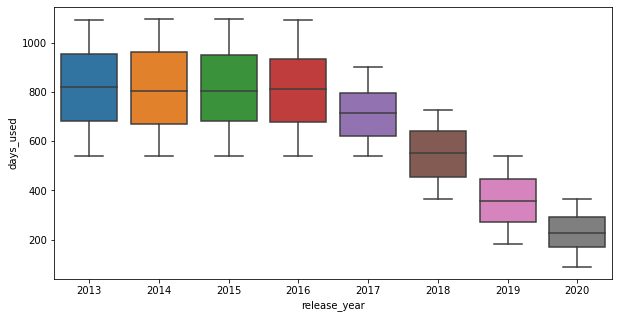

In [ ]:
# Lets take a look at release_year and days_used
plt.figure(figsize = (10,5))
sns.boxplot(data=data, x = 'release_year', y = 'days_used')
plt.show()
# Although this graph may seem extremely obvious I think it is interesting that we can clearly see that there is consistent number of days where people tend to stop using their phone

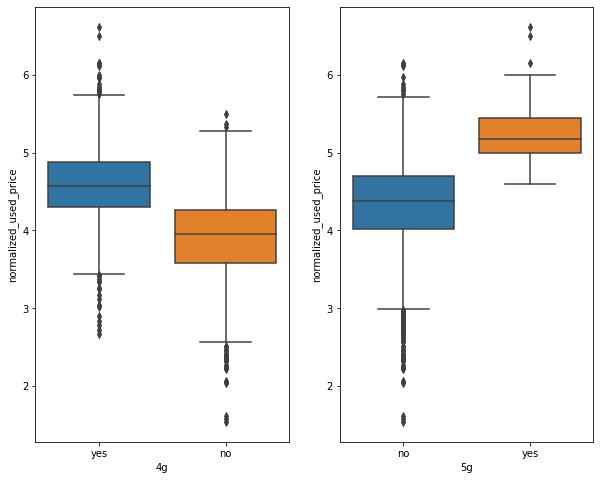

In [ ]:
# Finally lets take a look at if 4g or 5g actually makes a difference
plt.figure(figsize = (10,8))

plt.subplot(121)
sns.boxplot(data=data, x = '4g',  y = 'normalized_used_price')
plt.subplot(122)
sns.boxplot(data=data, x = '5g', y = 'normalized_used_price')

plt.show()
# It seem like for the phones that have 5g have a higher used price than those who don't.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# We will be fixing missing values so it's always a good idea to make a copy
df2 = df.copy()

# Use this to find missing values in each column
df2.isnull().sum()
# We can see that there are some missing values in the rows main_camera_mp, selfie camera_mp, in_memory, ram, battery, and weight

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Lets make a list of the columns with missing values so we can patch them properly
missing_columns = ['main_camera_mp','selfie_camera_mp','battery','weight']

# In order to keep the integrity of the currently data set I will fill the missing values with the median.
for column in missing_columns:
  df2[column] = df2[column].fillna(value = df2.groupby(['release_year','brand_name'])[column].transform('median'))

# Check again for missing values
df2.isnull().sum()
# We have eliminated some of the missing values by inserting the median of the columns
# The statistics of the data should not change too much because there were only a very small percentage of missing data.

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Replacing more of the missing data this time just grouped by brand name
missing_columns = ['main_camera_mp','selfie_camera_mp','battery','weight']

for column in missing_columns:
  df2[column] = df2[column].fillna(value = df2.groupby(['brand_name'])[column].transform('median'))

df2.isnull().sum()
# We are almost there only 10 left to fix in main_camera_mp

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# Finding the median of the main_camera_mp column (I know you can fill and transform all in one line I just could not get it to work)
df2['main_camera_mp'].median()

8.0

In [ ]:
# Using the median to fill in the missing values
df2['main_camera_mp'] = df2['main_camera_mp'].fillna(8)

df2.isnull().sum()
# As you can see we now have no missing values in our data frame

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Outlier Detection

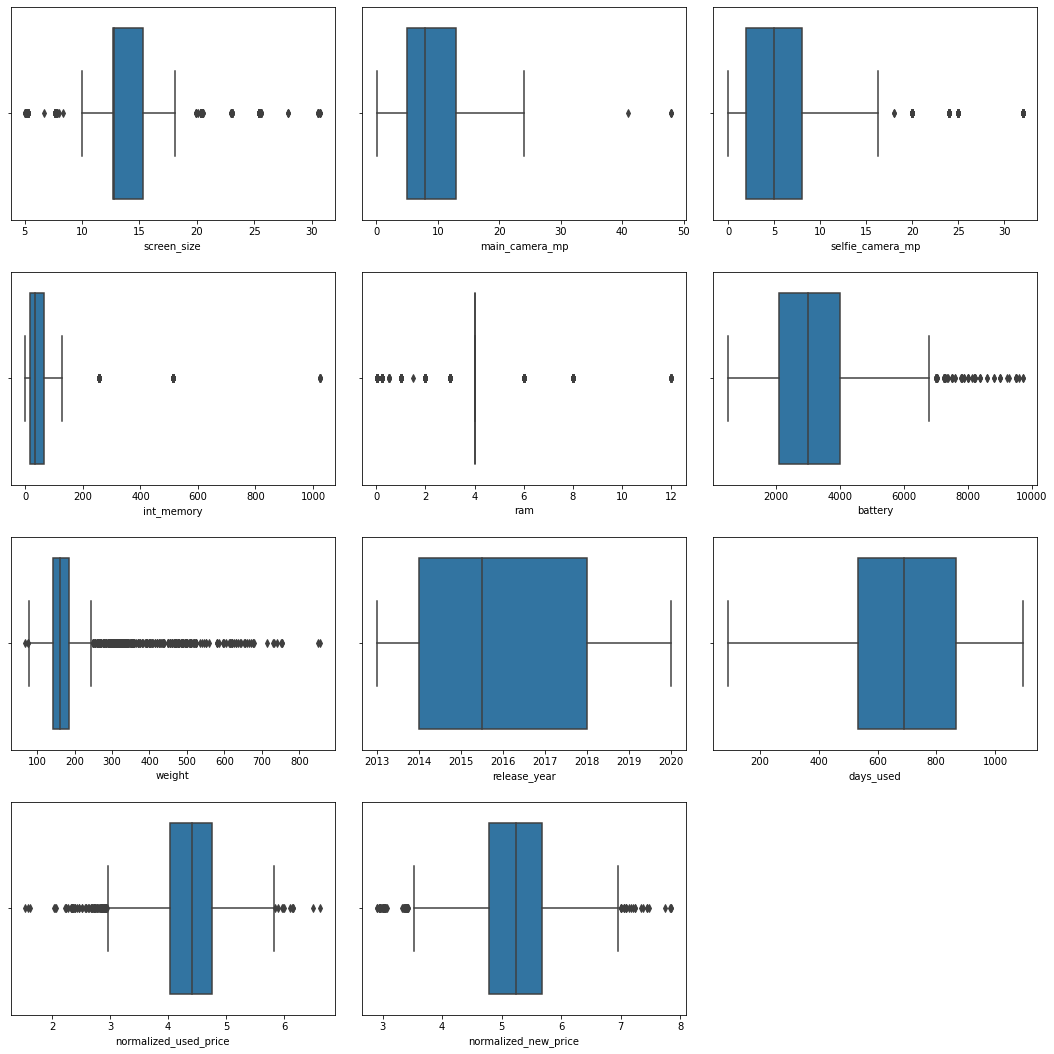

In [ ]:
# We can use multiple box plots in order to look for outliers in our data. 
# By seting up a for loop we can cycle through each element of the list and make a boxplot for it
numeric_columns = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram','battery','weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df2, x=variable)
    plt.tight_layout(pad=2)

plt.show()
# There are some outliers that could appear strange, but are accurate.

In [ ]:
# It does not appear that there are an extreme outliers that need further investigation

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# This is the original description of the data with missing values
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [ ]:
# This is the newly altered data frame
df2.describe()
# By comparing the two data tables you can see that the means of the ammended columns have changed ever so slightly.
# This was expected, but nothing to worry about.

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.617597,6.555067,54.528474,4.032620,3132.577446,182.636856,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.749438,6.968440,84.934991,1.368598,1298.884193,88.360445,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


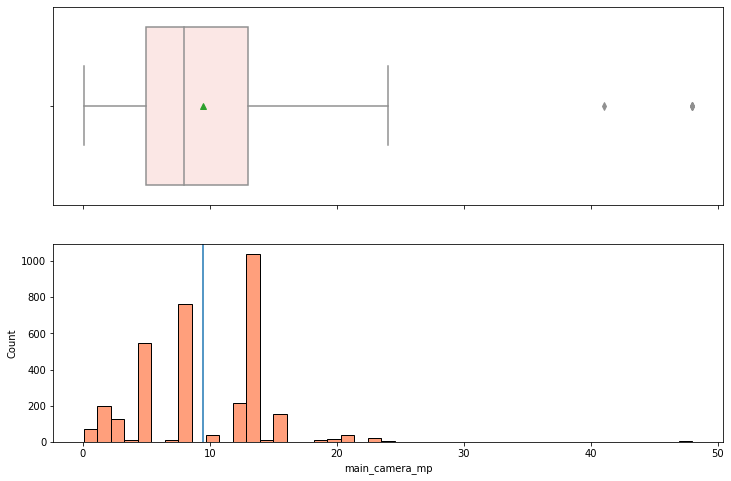

In [ ]:
# Lets take a look at the graph of the new main_camera_mp since that was the one with the most missing values compared to the old graph
combo_hist_box(df, 'main_camera_mp')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


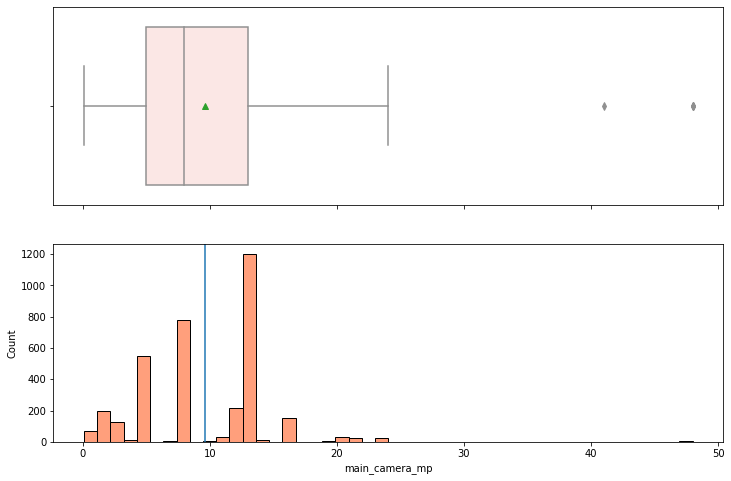

In [ ]:
combo_hist_box(df2, 'main_camera_mp')
# You can see some changes with the histogram, but like we can see that the mean basically stays the same

## Data Preparation

In [ ]:
# We need to prepare our data and define and X and a Y or independent and dependent 
# Since we are trying to predict the normalized price of used devices we take everything but the used_price as X
# and just the normalized_used_price as the Y
X = df2.drop(['normalized_used_price'], axis=1)
y = df2['normalized_used_price']

print(X.head())
print(y.head())
# And we print them just to check that they work

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [ ]:
# This adds the intercept to the data
X = sm.add_constant(X)

NameError: ignored

In [ ]:
# Creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True,)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Use this to split the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Print it out and make sure everything looks right
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
# Code to fit OLS model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                           23:04:59   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model 
def model_performance_regression(model, predictors, target):
  # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Assumptions of Linear Regression:
1. No Multicollinearirty
1. Linearity of variables
1. Independance of error terms
1. Normality of error terms
1. No Heteroscedasticity

**Test for Multicollnearity**

In [ ]:
# Import in the correct test and define the function that will help us
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
# Use the defined function above to find the VIF
checking_vif(x_train)

,feature,VIF
0,const,3.791593e+06
1,screen_size,7.677290e+00
2,main_camera_mp,2.285051e+00
3,selfie_camera_mp,2.812473e+00
4,int_memory,1.364152e+00
5,ram,2.282352e+00
6,battery,4.081780e+00
7,weight,6.396749e+00
8,release_year,4.899007e+00
9,days_used,2.660269e+00


We can see that there are no extreme VIF values, but we should check screen_size and weight since both are greater than 5. And there is no need to check the dummy variables.

### Removing Multicollinearity

In [ ]:
# We can treat multicollinearilty with this useful function
def treating_multicollinearity(predictors, target, high_vif_columns):

    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# We create a column list of the variables that we are going to drop test.
col_list = ['screen_size','weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
# First we drop screen_size and see how that affects our data
col_to_drop = 'screen_size'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3.664323e+06
1,main_camera_mp,2.281835e+00
2,selfie_camera_mp,2.809009e+00
3,int_memory,1.362043e+00
4,ram,2.282350e+00
5,battery,3.842989e+00
6,weight,2.993855e+00
7,release_year,4.730315e+00
8,days_used,2.648929e+00
9,normalized_new_price,3.077650e+00


After dropping screen size we can see that every one of our variables are less than 5 meaning we dealt with the threat of multicollinearity.

In [ ]:
# Reprint the olsmodel with our recent changes
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                           23:06:21   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dealing with high p-value variable

In [ ]:
# initial list of columns
# Use this to determine which variables surpass the p-value threshold
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)
# Those variables featured in the list below are good to keep

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                           23:06:36   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Again checking model performance on training set after out changes
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# Again checking model performance on test set after out changes
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


In [ ]:
# By creating a new data frame of the actual values, the fitted values, and the residuals,
# It will help us determine linearity, independence, and normality
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train 
df_pred["Fitted Values"] = olsmod2.fittedvalues  
df_pred["Residuals"] = olsmod2.resid  

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


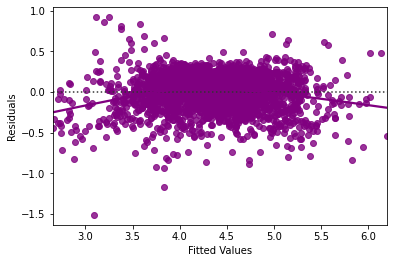

In [ ]:
# We can plot the fitted versus residual plot to gather some infomation
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

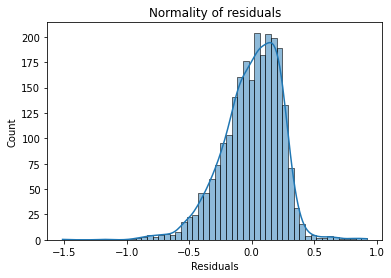

In [ ]:
# We can plot a histgram to see an intial idea about its normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()
# After plotting the graph we can see that under a certain lens it can be seen as normal.

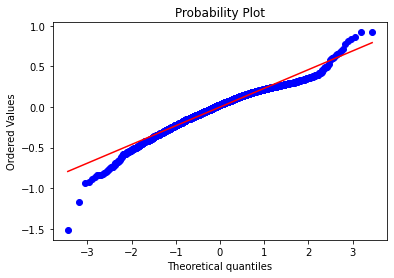

In [ ]:
# Import and untilize the proper libraries in order to check the Q-Q plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()
# The graph stays pretty normal up until the last portion just like in the graph above.

In [ ]:
stats.shapiro(df_pred["Residuals"])
# By the Shapiro-Wilk test we can say that the residuals are not normal.
# However as an approximation the distribution is close to normal.

(0.9676972031593323, 6.995328206686811e-23)

In [ ]:
# Import in the proper libraries to test for homoscedasticity and run the test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)
# Since the p-value is greater than 0.05 we can say that the residuals are homoscedastic.

[('F statistic', 1.008750419910675), ('p-value', 0.44019706506678935)]

In [ ]:
# Finally we can check our predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)
# Looks good they are really comparable

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


## Final Model

In [ ]:
#Print out the final model
olsmod_final = sm.OLS(y_train, x_train3).fit()
print(olsmod_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 27 May 2022   Prob (F-statistic):               0.00
Time:                           23:08:42   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# Print out the final model proformance on the training set.
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod_final, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# Print out the final model proformance on the test set.
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


## Actionable Insights and Recommendations 

- This final model is able to explain ~84% of the variation in the data and with 4.6% of the normalized used price on the test data.
-The main camera mp, selfie camera mp, and ram are all influenctial when it comes to determining the price. If you increase their unit by 1 then the used price increases by 0.0210, 0.0138, and 0.0207 respectively.
-But by far we can see that biggest influence to the normalized used price is the release year. If we increase the release year by one unit the used price will go up by 0.0292 units.
- Along with this, the company should look for the newest phones not only because of the above point, but because most newer phones have all better qualities; thus, increasing the price all along the board.
-We can see that 5g is 0.0673 units less while 4g is 0.0502 more. Which tells the company that they might want to put less focus into getting 5g.
-With the OLS model we can also see what brands do better or worse. For example, Xiaomi and Karbonn do great while Samsung and Sony are on the negative ends.
- I think this a really good summary of the things ideal qualities to insure a high resell price while also acknowledging some categorical bias.


___